In [ ]:
from sklearn.linear_model import LinearRegression

In [34]:
from sklearn.linear_model import LinearRegression
LR=LinearRegression()
t=[[5],[7],[12],[16],[20]]
m=[40,120,180,210,240]
LR.fit(t,m)
LR.predict([[5.5]])

array([78.64935065])

In [35]:
import pandas as pd #for importing dataset
import numpy as nm #for doing mathematical operations
from sklearn.model_selection import train_test_split as ttp #to break dataset for training and testing
from sklearn.metrics import classification_report # to generate classification report
import re #for data cleaning purpose
import string #to deal with text data
import matplotlib.pyplot as plt #for visualizing dataset

In [36]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [37]:
data_true=pd.read_csv("/content/drive/MyDrive/DAP_TEAM 1/original.csv")
data_fake=pd.read_csv("/content/drive/MyDrive/DAP_TEAM 1/expand.csv")

In [38]:
data_true.head(5)

,Unnamed: 0,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,MathScore,ReadingScore,WritingScore
0,0,female,group B,bachelor's degree,standard,none,72,72,74
1,1,female,group C,some college,standard,completed,69,90,88
2,2,female,group B,master's degree,standard,none,90,95,93
3,3,male,group A,associate's degree,free/reduced,none,47,57,44
4,4,male,group C,some college,standard,none,76,78,75


In [39]:
data_fake.head(5)

,Unnamed: 0,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
0,0,female,NaN,bachelor's degree,standard,none,married,regularly,yes,3.0,school_bus,< 5,71,71,74
1,1,female,group C,some college,standard,NaN,married,sometimes,yes,0.0,NaN,5 - 10,69,90,88
2,2,female,group B,master's degree,standard,none,single,sometimes,yes,4.0,school_bus,< 5,87,93,91
3,3,male,group A,associate's degree,free/reduced,none,married,never,no,1.0,NaN,5 - 10,45,56,42
4,4,male,group C,some college,standard,none,married,sometimes,yes,0.0,school_bus,5 - 10,76,78,75


In [40]:
data_true.shape, data_fake.shape

((30641, 9), (30641, 15))

In [41]:
data_true["class"]=1
data_fake["class"]=0

In [42]:
data_true_manual_testing = data_true.tail(10)
for i in range(21416,21406,-1):
    data_true.drop([i],axis=0, inplace=True)#removing those 10 values from original dataset

data_fake_manual_testing = data_fake.tail(10)
for i in range(21416,21406,-1):
    data_fake.drop([i],axis=0, inplace=True)#removing those 10 values from original dataset

In [43]:
data_manual_testing = pd.concat([data_fake_manual_testing, data_true_manual_testing], axis=0)
data_manual_testing.to_csv("manual_testing.csv ")

In [44]:
data_merge = pd.concat([data_fake,data_true],axis=0)
data_merge.head(10)#displaying first 10 values after above operation

,Unnamed: 0,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore,class
0,0,female,NaN,bachelor's degree,standard,none,married,regularly,yes,3.0,school_bus,< 5,71,71,74,0
1,1,female,group C,some college,standard,NaN,married,sometimes,yes,0.0,NaN,5 - 10,69,90,88,0
2,2,female,group B,master's degree,standard,none,single,sometimes,yes,4.0,school_bus,< 5,87,93,91,0
3,3,male,group A,associate's degree,free/reduced,none,married,never,no,1.0,NaN,5 - 10,45,56,42,0
4,4,male,group C,some college,standard,none,married,sometimes,yes,0.0,school_bus,5 - 10,76,78,75,0
5,5,female,group B,associate's degree,standard,none,married,regularly,yes,1.0,school_bus,5 - 10,73,84,79,0
6,6,female,group B,some college,standard,completed,widowed,never,no,1.0,private,5 - 10,85,93,89,0
7,7,male,group B,some college,free/reduced,none,married,sometimes,yes,1.0,private,> 10,41,43,39,0
8,8,male,group D,high school,free/reduced,completed,single,sometimes,no,3.0,private,> 10,65,64,68,0
9,9,female,group B,high school,free/reduced,none,married,regularly,yes,NaN,private,< 5,37,59,50,0


Gender
female    29909
male      29515
Name: EthnicGroup, dtype: int64


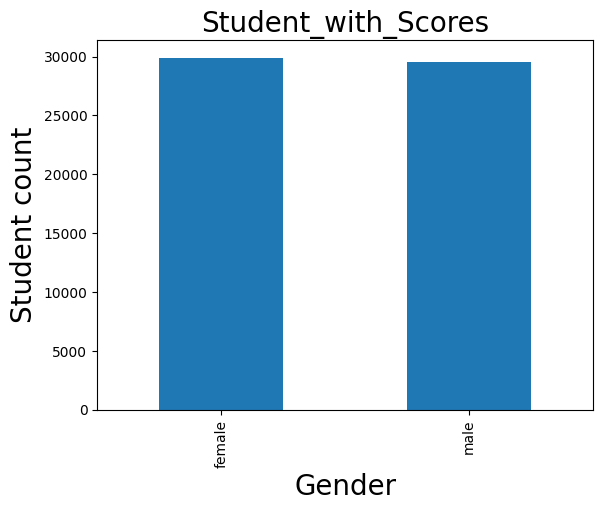

In [45]:
print(data_merge.groupby(['Gender'])['EthnicGroup'].count())
data_merge.groupby(['Gender'])['EthnicGroup'].count().plot(kind="bar")
plt.title("Student_with_Scores",size=20)
plt.xlabel("Gender",size=20)
plt.ylabel("Student count",size=20)
plt.show()

class
0    28793
1    30631
Name: EthnicGroup, dtype: int64
0 = Fake news
1 = True news


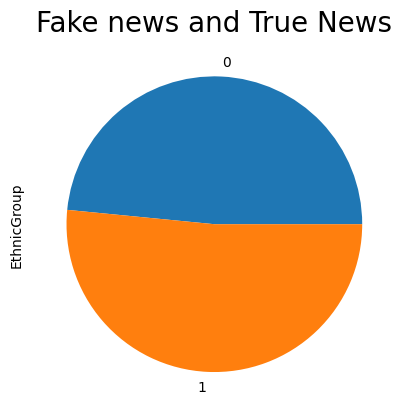

In [46]:
print(data_merge.groupby(['class'])['EthnicGroup'].count())
print("0 = Fake news\n1 = True news")
data_merge.groupby(['class'])['EthnicGroup'].count().plot(kind="pie")
plt.title("Fake news and True News",size=20)
plt.show()

In [48]:
data = data_merge.drop(["TestPrep", "Gender", "LunchType"], axis=1)
data.head(10) #displaying remaining dataset

,Unnamed: 0,EthnicGroup,ParentEduc,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore,class
0,0,NaN,bachelor's degree,married,regularly,yes,3.0,school_bus,< 5,71,71,74,0
1,1,group C,some college,married,sometimes,yes,0.0,NaN,5 - 10,69,90,88,0
2,2,group B,master's degree,single,sometimes,yes,4.0,school_bus,< 5,87,93,91,0
3,3,group A,associate's degree,married,never,no,1.0,NaN,5 - 10,45,56,42,0
4,4,group C,some college,married,sometimes,yes,0.0,school_bus,5 - 10,76,78,75,0
5,5,group B,associate's degree,married,regularly,yes,1.0,school_bus,5 - 10,73,84,79,0
6,6,group B,some college,widowed,never,no,1.0,private,5 - 10,85,93,89,0
7,7,group B,some college,married,sometimes,yes,1.0,private,> 10,41,43,39,0
8,8,group D,high school,single,sometimes,no,3.0,private,> 10,65,64,68,0
9,9,group B,high school,married,regularly,yes,NaN,private,< 5,37,59,50,0


In [49]:
data=data.sample(frac=1)
data.head(10)

,Unnamed: 0,EthnicGroup,ParentEduc,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore,class
8460,955,group A,master's degree,married,sometimes,no,2.0,private,> 10,48,73,72,0
17261,379,group C,some college,NaN,NaN,NaN,NaN,NaN,NaN,71,76,72,1
1204,204,group D,some college,NaN,NaN,NaN,NaN,NaN,NaN,62,63,67,1
23429,968,group C,some college,married,sometimes,no,1.0,school_bus,> 10,61,66,62,0
18348,518,group C,some high school,divorced,regularly,yes,1.0,school_bus,< 5,52,46,37,0
24910,551,group E,bachelor's degree,single,regularly,yes,2.0,school_bus,> 10,77,69,66,0
7089,491,NaN,NaN,married,sometimes,yes,2.0,NaN,> 10,69,77,84,0
14199,279,group D,some college,NaN,NaN,NaN,NaN,NaN,NaN,35,52,46,1
7288,700,group E,high school,married,sometimes,yes,1.0,NaN,5 - 10,57,51,47,0
6350,699,group D,associate's degree,divorced,regularly,no,3.0,school_bus,< 5,89,99,100,0


In [50]:
data.isnull().sum()

Unnamed: 0                 0
EthnicGroup             1838
ParentEduc              1843
ParentMaritalStatus    31820
PracticeSport          31262
IsFirstChild           31535
NrSiblings             32203
TransportMeans         33762
WklyStudyHours         31585
MathScore                  0
ReadingScore               0
WritingScore               0
class                      0
dtype: int64